## Import Library

In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


## Import Dataset

### Dataset is preprocessed (cleaning, merging, K-mer)

In [2]:
data = pd.read_csv('DNAdata_Kmer.csv')

In [3]:
data.drop(data.columns[[0]], axis=1, inplace=True)

In [4]:
data

,len,cancer,seq
0,27,0,"['tgctaa', 'gctaac', 'ctaaca', 'taacag', 'aaca..."
1,24,0,"['agagtc', 'gagtcg', 'agtcgg', 'gtcggt', 'tcgg..."
2,23,0,"['caccgt', 'accgtc', 'ccgtca', 'cgtcag', 'gtca..."
3,32,0,"['agagct', 'gagcta', 'agctaa', 'gctaaa', 'ctaa..."
4,20,0,"['acgcgg', 'cgcggc', 'gcggcc', 'cggcca', 'ggcc..."
...,...,...,...
753,616,4,"['aagaca', 'agacat', 'gacatc', 'acatca', 'catc..."
754,546,4,"['ggagct', 'gagctc', 'agctct', 'gctctc', 'ctct..."
755,557,4,"['tcacgg', 'cacggg', 'acggga', 'cgggag', 'ggga..."
756,564,4,"['attaac', 'ttaacc', 'taacca', 'aaccac', 'acca..."


## Allocate independent and dependent features to x & y respectively

## 
0: Bladder Cancer,
1: Bone Cancer,
2: Brain Cancer,
3: Colorectal Cancer,
4: Head_and_neck Cancer

In [5]:
y = data.iloc[:, 1].values 
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [6]:
x = data.iloc[:, 2].values 
x

In [7]:
print(x[2])

['caccgt', 'accgtc', 'ccgtca', 'cgtcag', 'gtcagt', 'tcagtg', 'cagtgc', 'agtgcc', 'gtgccg', 'tgccgt', 'gccgtg', 'ccgtgt', 'cgtgtt', 'gtgttc', 'tgttcc', 'gttcca', 'ttccag', 'tccagg']


In [10]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
x = cv.fit_transform(x)

### Change data type of x to array

### "scipy.sparse._csr.csr_matrix" to "numpy.ndarray"

In [13]:
x = x.toarray()
type(x)

numpy.ndarray

In [12]:
print(x.shape)

(758, 281538)


In [14]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Spliting Dataset 

In [15]:
#split data into training,validation and test sets

#split the data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#split the training set into two (training and validation)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

## Model creation

In [16]:
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

In [17]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=x_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [18]:
#fit the model to the training data
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32,epochs=200, verbose=1)


Epoch 1/200

19/19 [==============================] - 8s 222ms/step - loss: 71.1767 - sparse_categorical_accuracy: 0.5066 - val_loss: 1.6398 - val_sparse_categorical_accuracy: 0.4013
Epoch 2/200
19/19 [==============================] - 2s 106ms/step - loss: 1.9430 - sparse_categorical_accuracy: 0.5429 - val_loss: 1.1668 - val_sparse_categorical_accuracy: 0.6579
Epoch 3/200
19/19 [==============================] - 2s 100ms/step - loss: 0.9106 - sparse_categorical_accuracy: 0.7673 - val_loss: 142.8746 - val_sparse_categorical_accuracy: 0.7303
Epoch 4/200
19/19 [==============================] - 2s 102ms/step - loss: 27.5250 - sparse_categorical_accuracy: 0.7492 - val_loss: 26.1589 - val_sparse_categorical_accuracy: 0.5132
Epoch 5/200
19/19 [==============================] - 2s 119ms/step - loss: 2.6184 - sparse_categorical_accuracy: 0.6205 - val_loss: 1.6464 - val_sparse_categorical_accuracy: 0.6250
Epoch 6/200
19/19 [==============================] - 2s 113ms/step - loss: 0.8669 - spars

Epoch 45/200
19/19 [==============================] - 2s 127ms/step - loss: 0.0168 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1854 - val_sparse_categorical_accuracy: 0.8618
Epoch 46/200
19/19 [==============================] - 2s 130ms/step - loss: 0.0119 - sparse_categorical_accuracy: 0.9967 - val_loss: 1.1866 - val_sparse_categorical_accuracy: 0.8618
Epoch 47/200
19/19 [==============================] - 2s 118ms/step - loss: 0.0118 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1889 - val_sparse_categorical_accuracy: 0.8618
Epoch 48/200
19/19 [==============================] - 2s 118ms/step - loss: 0.0098 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1859 - val_sparse_categorical_accuracy: 0.8618
Epoch 49/200
19/19 [==============================] - 2s 118ms/step - loss: 0.0133 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1835 - val_sparse_categorical_accuracy: 0.8618
Epoch 50/200
19/19 [==============================] - 2s 119ms/step - loss: 0.0089 - spars

19/19 [==============================] - 2s 124ms/step - loss: 0.0065 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1789 - val_sparse_categorical_accuracy: 0.8684
Epoch 91/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0056 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1786 - val_sparse_categorical_accuracy: 0.8684
Epoch 92/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0041 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1776 - val_sparse_categorical_accuracy: 0.8684
Epoch 93/200
19/19 [==============================] - 2s 120ms/step - loss: 0.0063 - sparse_categorical_accuracy: 0.9967 - val_loss: 1.1787 - val_sparse_categorical_accuracy: 0.8684
Epoch 94/200
19/19 [==============================] - 2s 119ms/step - loss: 0.0041 - sparse_categorical_accuracy: 0.9967 - val_loss: 1.1788 - val_sparse_categorical_accuracy: 0.8684
Epoch 95/200
19/19 [==============================] - 2s 122ms/step - loss: 0.0059 - sparse_categorical

Epoch 135/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0055 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1899 - val_sparse_categorical_accuracy: 0.8684
Epoch 136/200
19/19 [==============================] - 2s 122ms/step - loss: 0.0145 - sparse_categorical_accuracy: 0.9950 - val_loss: 1.1977 - val_sparse_categorical_accuracy: 0.8684
Epoch 137/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.1846 - val_sparse_categorical_accuracy: 0.8684
Epoch 138/200
19/19 [==============================] - 2s 120ms/step - loss: 0.0118 - sparse_categorical_accuracy: 0.9967 - val_loss: 1.1943 - val_sparse_categorical_accuracy: 0.8684
Epoch 139/200
19/19 [==============================] - 2s 122ms/step - loss: 0.0032 - sparse_categorical_accuracy: 0.9967 - val_loss: 1.1922 - val_sparse_categorical_accuracy: 0.8684
Epoch 140/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0089 -

Epoch 180/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0117 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.2024 - val_sparse_categorical_accuracy: 0.8684
Epoch 181/200
19/19 [==============================] - 2s 120ms/step - loss: 0.0015 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.2102 - val_sparse_categorical_accuracy: 0.8684
Epoch 182/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0077 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.2076 - val_sparse_categorical_accuracy: 0.8684
Epoch 183/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0125 - sparse_categorical_accuracy: 0.9983 - val_loss: 1.2010 - val_sparse_categorical_accuracy: 0.8684
Epoch 184/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0093 - sparse_categorical_accuracy: 0.9967 - val_loss: 1.2143 - val_sparse_categorical_accuracy: 0.8684
Epoch 185/200
19/19 [==============================] - 2s 121ms/step - loss: 0.0060 -

## Create Confussion matrix

In [19]:
predictions = model.predict(x_test)
accuracy = model.evaluate(x_test, y_test, verbose=0)

5/5 [==============================] - 1s 29ms/step


In [20]:
y_predicted = model.predict(x_test)
y_predicted[6]

5/5 [==============================] - 0s 32ms/step


array([6.4477535e-05, 4.8835955e-05, 9.9974936e-01, 1.3126638e-04,
       6.1125361e-06], dtype=float32)

In [21]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[4, 3, 4, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[25,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0],
       [ 0,  0, 21,  0,  1],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 74]])>

Text(95.72222222222221, 0.5, 'Truth')

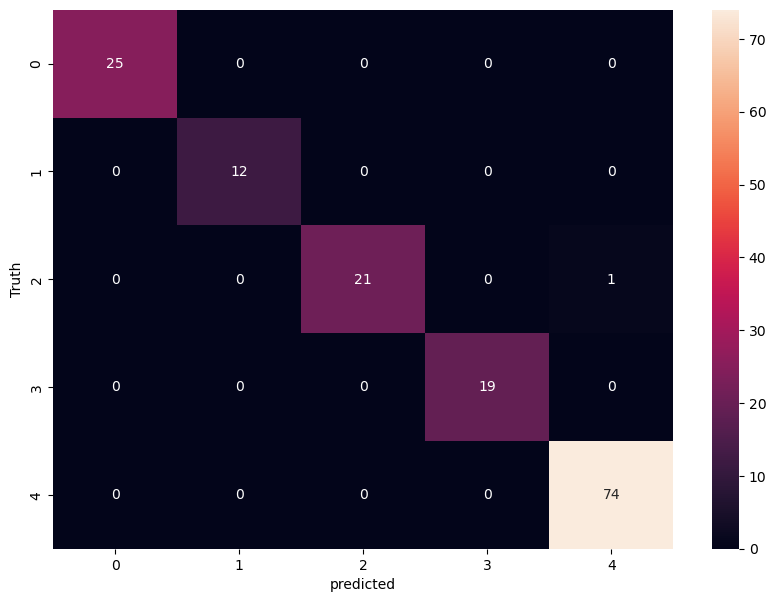

In [23]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [24]:
model.predict(x_test)

5/5 [==============================] - 0s 34ms/step


array([[2.60911658e-29, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [3.59694586e-33, 4.43469456e-10, 6.17511935e-26, 1.00000000e+00,
        4.90330387e-10],
       [3.37352790e-02, 2.74276845e-02, 1.39349457e-02, 7.21846074e-02,
        8.52717459e-01],
       [9.99937296e-01, 1.37019910e-07, 1.08793101e-05, 4.96681096e-05,
        2.03149079e-06],
       [2.65057193e-34, 8.06163692e-22, 0.00000000e+00, 3.76641303e-21,
        1.00000000e+00],
       [9.99937296e-01, 1.37019910e-07, 1.08793101e-05, 4.96681096e-05,
        2.03149079e-06],
       [6.44775355e-05, 4.88359547e-05, 9.99749362e-01, 1.31266381e-04,
        6.11253608e-06],
       [9.99867320e-01, 3.07815327e-07, 2.19729263e-05, 1.05145446e-04,
        5.22233358e-06],
       [1.42249569e-31, 1.00000000e+00, 4.77816209e-16, 5.19931702e-11,
        1.31088812e-18],
       [8.47606498e-06, 1.33501890e-04, 8.06862261e-07, 1.69506136e-04,
        9.99687672e-01],
       [9.59062163e-05, 5.9790

In [25]:
print(model.evaluate(x_test, y_test))

5/5 [==============================] - 0s 30ms/step - loss: 0.0329 - sparse_categorical_accuracy: 0.9934
[0.03291035816073418, 0.9934210777282715]
